# Keywords
- Use extracted keywords from S-1 raw filings
- Word2Vect visualization method by Jeff Delaney: Visualizing Word Vectors with t-SNE
 - https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [1]:
#core
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

import glob
import nasdaq
import ml
from pathlib import Path
from sklearn.manifold import TSNE

#NLP
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from gensim.summarization import keywords
from gensim.models import Word2Vec

C:\Users\Void\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Load Previous Dataset

In [2]:
df = pd.read_csv('../Datasets/3 summarization.csv', index_col='Symbol')

# Integrating IPO Keywords

In [3]:
#add sentiment features
df_keywords_features = pd.DataFrame()
counter = 0    
documents = []

for x in df.index:
    try:
        counter += 1
        print('\n( ' + str(counter) + ' / ' + str(df.shape[0]) + ' ) ' + x)

        #check if keywords are available
        file_name = "../Keywords/" + x + ".txt"
        if Path(file_name).is_file():
            #load data
            with open(file_name, "r", encoding="utf-8") as file:
                text = file.read()
                documents.append(word_tokenize(text))
                
                #get sentiment
                #df_sentiment = get_sentiment_df(text)
                #df_sentiment_features = pd.concat([df_sentiment_features, add_sentiment_features(df_sentiment, x)], axis=0)
        else:
            print('no S-1 keywords for ', x)
    except Exception as e:
        print(x, e)
        
#combine original data with standardized sentiment features
#df1 = pd.concat([ml.standardize(df_sentiment_features), df], axis=1).dropna()        


( 1 / 696 ) AACC

( 2 / 696 ) AAT

( 3 / 696 ) ABR

( 4 / 696 ) ABTX

( 5 / 696 ) ACAD

( 6 / 696 ) ACFC

( 7 / 696 ) ACIA

( 8 / 696 ) ACMR

( 9 / 696 ) ACOR

( 10 / 696 ) ACRX

( 11 / 696 ) ACUS

( 12 / 696 ) ADMS

( 13 / 696 ) ADOM

( 14 / 696 ) ADRO

( 15 / 696 ) ADSW

( 16 / 696 ) ADT

( 17 / 696 ) ADUS

( 18 / 696 ) AEL

( 19 / 696 ) AERI

( 20 / 696 ) AFFY

( 21 / 696 ) AFH

( 22 / 696 ) AIMC

( 23 / 696 ) AIMT

( 24 / 696 ) AIZ

( 25 / 696 ) AJX

( 26 / 696 ) AKAO

( 27 / 696 ) AKBA

( 28 / 696 ) AKER

( 29 / 696 ) AL

( 30 / 696 ) ALDR

( 31 / 696 ) ALDX

( 32 / 696 ) ALGT

( 33 / 696 ) ALRM

( 34 / 696 ) ALRN

( 35 / 696 ) ALSN

( 36 / 696 ) AM

( 37 / 696 ) AMBA

( 38 / 696 ) AMGP

( 39 / 696 ) ANAB

( 40 / 696 ) ANET

( 41 / 696 ) ANGI

( 42 / 696 ) ANTH

( 43 / 696 ) APAM

( 44 / 696 ) APEI

( 45 / 696 ) APKT

( 46 / 696 ) APO

( 47 / 696 ) APPF

( 48 / 696 ) APPN

( 49 / 696 ) APRN

( 50 / 696 ) ARMK

( 51 / 696 ) ARMO

( 52 / 696 ) ARYX

( 53 / 696 ) ASV

( 54 / 696 ) A


( 568 / 696 ) SOI

( 569 / 696 ) SOMX

( 570 / 696 ) SONA

( 571 / 696 ) SOYB

( 572 / 696 ) SPKE

( 573 / 696 ) SPLK

( 574 / 696 ) SPRO

( 575 / 696 ) SPSC

( 576 / 696 ) SPWH

( 577 / 696 ) SPWR

( 578 / 696 ) SREV

( 579 / 696 ) SRLP

( 580 / 696 ) SSNC

( 581 / 696 ) SSTI

( 582 / 696 ) SSTK

( 583 / 696 ) STAY

( 584 / 696 ) STDY

( 585 / 696 ) STML

( 586 / 696 ) STND

( 587 / 696 ) STON

( 588 / 696 ) STWD

( 589 / 696 ) SUPN

( 590 / 696 ) SXC

( 591 / 696 ) SXCP

( 592 / 696 ) SYF

( 593 / 696 ) SYNA

( 594 / 696 ) SYRS

( 595 / 696 ) TAGS

( 596 / 696 ) TAST

( 597 / 696 ) TBK

( 598 / 696 ) TBNK

( 599 / 696 ) TCMD

( 600 / 696 ) TCON

( 601 / 696 ) TCS

( 602 / 696 ) TDG

( 603 / 696 ) TEGP

( 604 / 696 ) TEP

( 605 / 696 ) TERP

( 606 / 696 ) TFSL

( 607 / 696 ) TGEN

( 608 / 696 ) TIS

( 609 / 696 ) TLOG

( 610 / 696 ) TLP

( 611 / 696 ) TLYS

( 612 / 696 ) TMHC

( 613 / 696 ) TNAV

( 614 / 696 ) TNET

( 615 / 696 ) TNTR

( 616 / 696 ) TOCA

( 617 / 696 ) TONS

( 618 / 

# Word2Vect

In [4]:
 # build vocabulary and train model
model = Word2Vec(documents, size=len(documents))

In [11]:
# Code by Jeff Delaney: Visualizing Word Vectors with t-SNE
# https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
matplotlib.rcParams.update({'font.size': 10})

C:\Users\Void\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


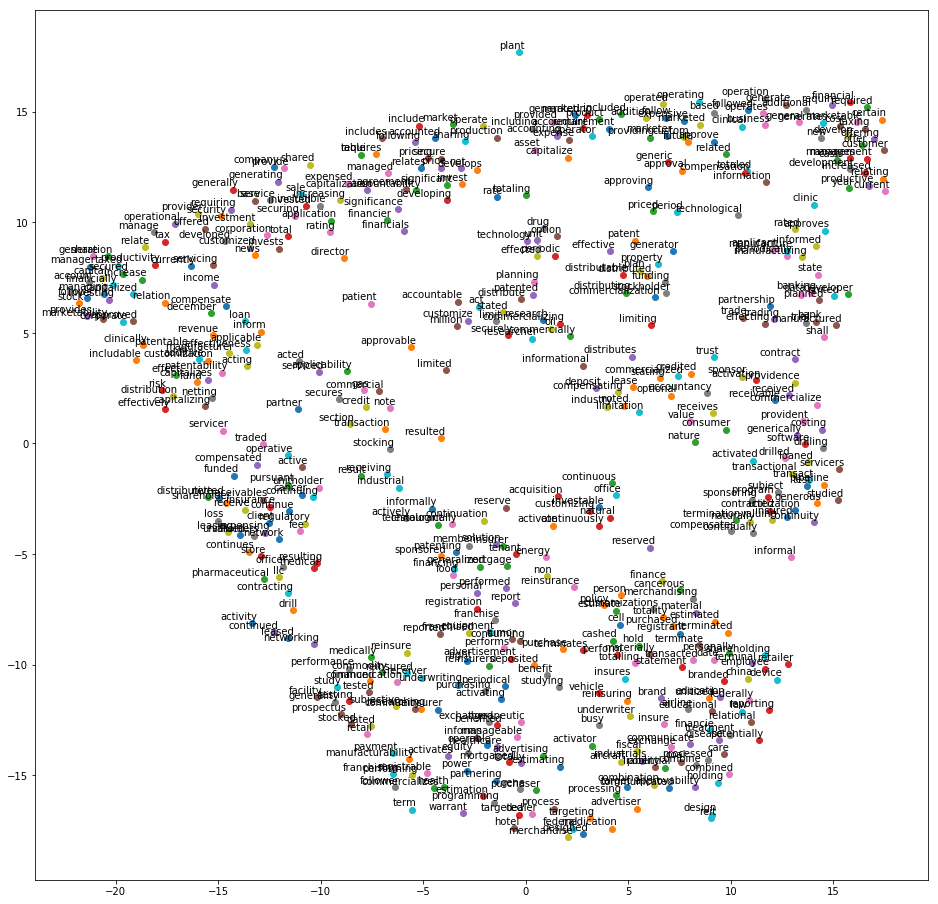

In [12]:
tsne_plot(model)

In [51]:
df1 = pd.concat([ml.standardize(df_sentiment_features), df], axis=1).dropna()        

In [52]:
#save for later improvements
df1.to_csv('../Datasets/3 summarization.csv', index=True, index_label='Symbol')

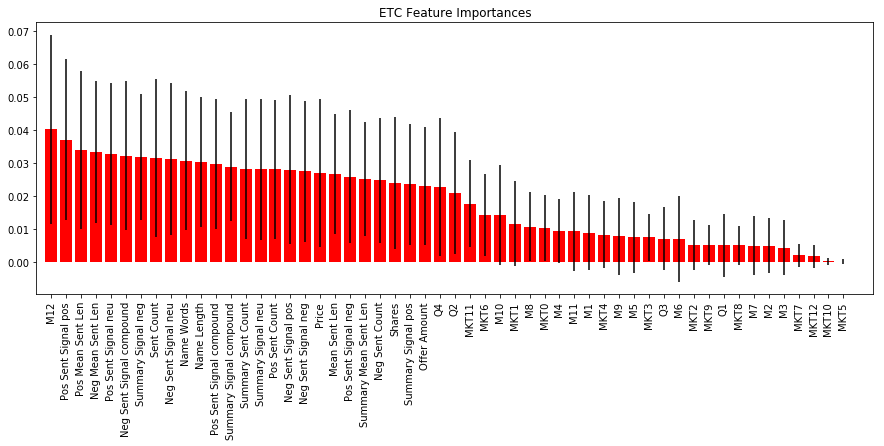

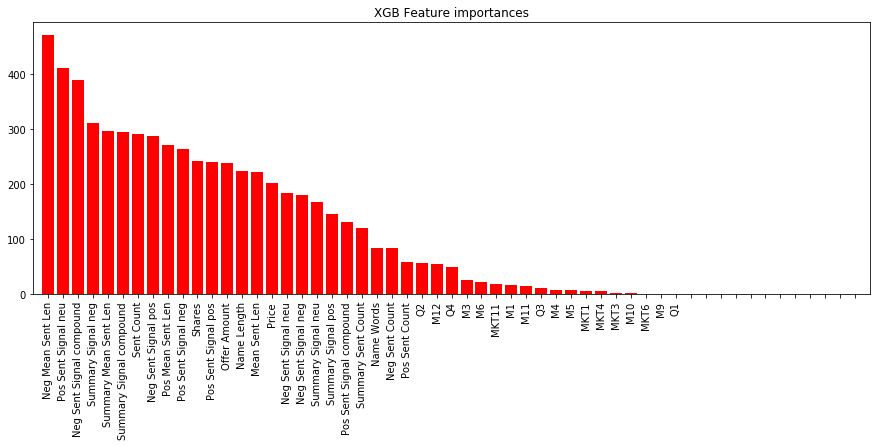

In [53]:
#feature importance
ml.show_feature_importance(df1, '3M')

In [54]:
#now run ML flow with sentiment features for summaries
ml.run_ml_flow(df1)

1D        1W        1M        3M
AUC      LR  0.539319  0.539319  0.539319  0.539319
         RF  0.530908  0.530908  0.530908  0.530908
f1       LR  0.681081  0.681081  0.681081  0.681081
         RF  0.744186  0.744186  0.744186  0.744186
log loss LR  0.676177  0.676177  0.676177  0.676177
         RF  0.661292  0.661292  0.661292  0.661292